# クラスタリング

In [2]:
import pickle 
import glob
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['font.family'] = "Noto Serif CJK JP"

%matplotlib inline

# ファイル読み込み
with open('../../data/Hazumi_features/Hazumi1911_features_bert.pkl', mode='rb') as f:
    TS_ternary, third_sentiment, third_persona, text, audio,\
    visual, vid = pickle.load(f, encoding='utf-8')

## 第三者アノテーション（標準化なし）

2    9
1    8
3    6
0    3
Name: cluster, dtype: int64


/tmp/ipykernel_880823/623552857.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
/tmp/ipykernel_880823/623552857.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
/tmp/ipykernel_880823/623552857.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
/tmp/ipykernel_880823/623552857.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)


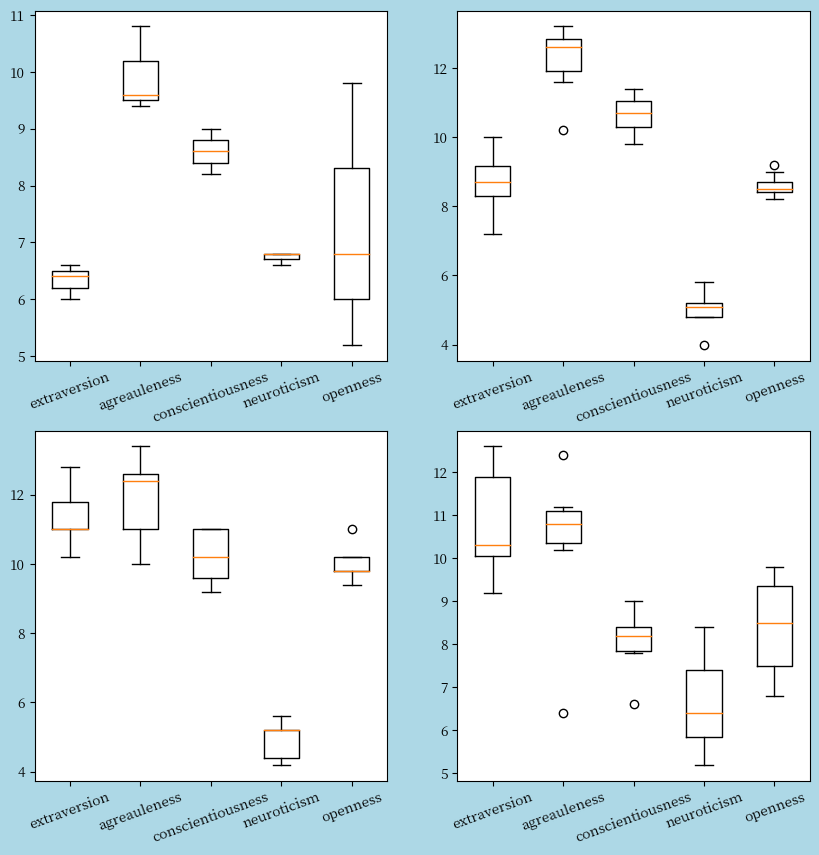

In [5]:
df = pd.DataFrame.from_dict(third_persona, orient="index", columns=['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'])

model = KMeans(n_clusters=4, random_state=1002)
model.fit(df)
cluster = model.labels_

df['cluster'] = cluster 
print(df['cluster'].value_counts())

df0 = df[df['cluster']==0].iloc[:,:-1]
df1 = df[df['cluster']==1].iloc[:,:-1]
df2 = df[df['cluster']==2].iloc[:,:-1]
df3 = df[df['cluster']==3].iloc[:,:-1]


fig = plt.figure(figsize=(10,10), facecolor='lightblue')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax2.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax3.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax4.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)

ax1.boxplot(df0)
ax2.boxplot(df1)
ax3.boxplot(df2)
ax4.boxplot(df3)


plt.show()

## 第三者アノテーション（標準化あり）

1    13
3     7
2     5
0     1
Name: cluster, dtype: int64


/tmp/ipykernel_184385/277217943.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
/tmp/ipykernel_184385/277217943.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
/tmp/ipykernel_184385/277217943.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
/tmp/ipykernel_184385/277217943.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)


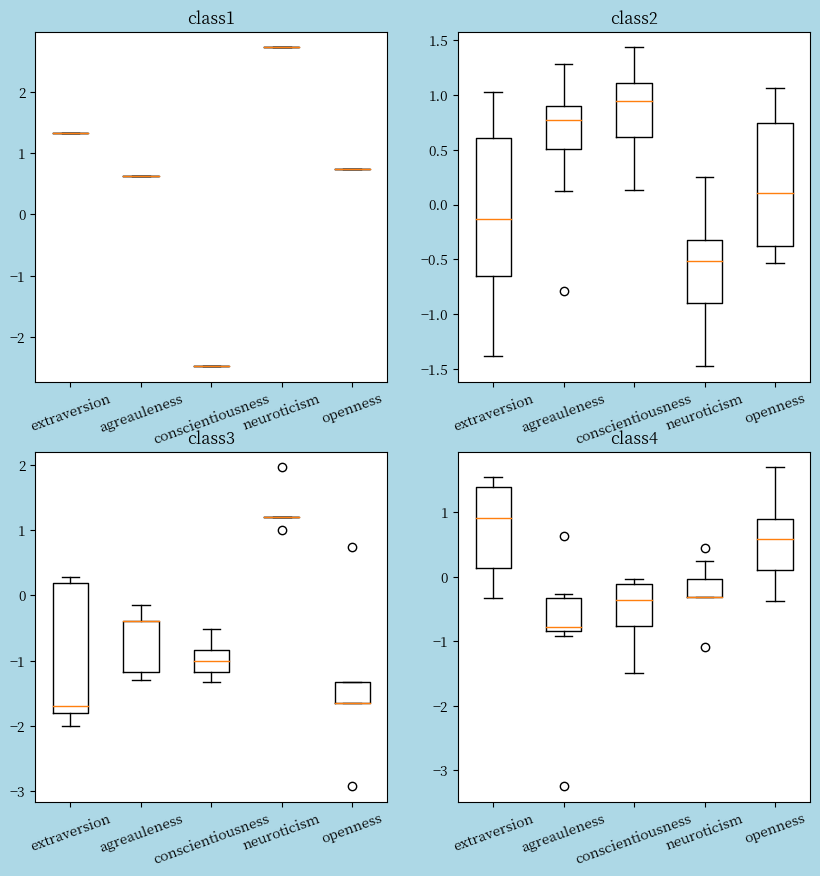

In [3]:
df = pd.DataFrame.from_dict(third_persona, orient="index", columns=['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'])
sc = StandardScaler()
df_sc = sc.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_sc)
cluster = model.labels_

df_sc['cluster'] = cluster 
print(df_sc['cluster'].value_counts())

df0 = df_sc[df_sc['cluster']==0].iloc[:,:-1]
df1 = df_sc[df_sc['cluster']==1].iloc[:,:-1]
df2 = df_sc[df_sc['cluster']==2].iloc[:,:-1]
df3 = df_sc[df_sc['cluster']==3].iloc[:,:-1]


fig = plt.figure(figsize=(10,10), facecolor='lightblue')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax2.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax3.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax4.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)

ax1.set_title('class1')
ax2.set_title('class2')
ax3.set_title('class3')
ax4.set_title('class4')

ax1.boxplot(df0)
ax2.boxplot(df1)
ax3.boxplot(df2)
ax4.boxplot(df3)

plt.show()

## 本人アノテーション（標準化なし）

In [ ]:
df = pd.DataFrame.from_dict(persona, orient="index", columns=['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'])

model = KMeans(n_clusters=4, random_state=1)
model.fit(df)
cluster = model.labels_

df['cluster'] = cluster 
print(df['cluster'].value_counts())

df0 = df[df['cluster']==0].iloc[:,:-1]
df1 = df[df['cluster']==1].iloc[:,:-1]
df2 = df[df['cluster']==2].iloc[:,:-1]
df3 = df[df['cluster']==3].iloc[:,:-1]


fig = plt.figure(figsize=(10,10), facecolor='lightblue')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax2.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax3.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax4.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)

ax1.boxplot(df0)
ax2.boxplot(df1)
ax3.boxplot(df2)
ax4.boxplot(df3)

plt.show()

## 本人アノテーション（標準化あり）

In [ ]:
df = pd.DataFrame.from_dict(persona, orient="index", columns=['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'])
sc = StandardScaler()
df_sc = sc.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_sc)
cluster = model.labels_ 

videoLabel = {} 

path = '../../data/Hazumi1911/dumpfiles/*'

files = glob.glob(path)

for i, file_path in enumerate(sorted(files)):
    filename = os.path.basename(file_path).split('.', 1)[0]
    df = pd.read_csv(file_path)

    videoLabel[filename] = cluster[i]


df_sc['cluster'] = cluster 
print(df_sc['cluster'].value_counts())
print(df_sc)

df0 = df_sc[df_sc['cluster']==0].iloc[:,:-1]
df1 = df_sc[df_sc['cluster']==1].iloc[:,:-1]
df2 = df_sc[df_sc['cluster']==2].iloc[:,:-1]
df3 = df_sc[df_sc['cluster']==3].iloc[:,:-1]


fig = plt.figure(figsize=(10,10), facecolor='lightblue')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax2.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax3.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax4.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)

ax1.set_title('class1')
ax2.set_title('class2')
ax3.set_title('class3')
ax4.set_title('class4')

ax1.boxplot(df0)
ax2.boxplot(df1)
ax3.boxplot(df2)
ax4.boxplot(df3)

plt.show()

## クラスタ数の決定

In [ ]:
# エルボー法を実行
sum_of_squared_errors = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=0, init='random')
    model.fit(df_sc)
    sum_of_squared_errors.append(model.inertia_)  # 損失関数の値を保存

plt.plot(range(1, 11), sum_of_squared_errors, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('sum of squared errors')
plt.show()

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def show_silhouette(fitted_model):
    cluster_labels = np.unique(fitted_model.labels_)
    num_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(df_sc, fitted_model.labels_)  # シルエット係数の計算
    # 可視化
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for idx, cls in enumerate(cluster_labels):
        cls_silhouette_vals = silhouette_vals[fitted_model.labels_==cls]
        cls_silhouette_vals.sort()
        y_ax_upper += len(cls_silhouette_vals)
        cmap = cm.get_cmap("Spectral")
        rgba = list(cmap(idx/num_clusters))  # rgbaの配列
        rgba[-1] = 0.7  # alpha値を0.7にする
        plt.barh(
            y=range(y_ax_lower, y_ax_upper), 
            width=cls_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=rgba)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.0)
        y_ax_lower += len(cls_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='orangered', linestyle='--')
    plt.xlabel('silhouette coefficient')
    plt.ylabel('cluster')
    plt.yticks(y_ticks, cluster_labels + 1)
    plt.show()


for i in range(2, 9):
    model = KMeans(n_clusters=i, random_state=0, init='random')
    model.fit(df_sc)
    show_silhouette(model)

In [ ]:
import umap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def load_big5(data):
    labels = [] 
    vectors = [] 
    for label, vector in data.items():
        labels.append(label)
        vectors.append(vector)
    return labels, vectors

def get_vectors_umap(vectors, n_neighbors, n_components):
    mapper = umap.UMAP(random_state=0, n_neighbors=n_neighbors, n_components=n_components) 
    embedding = mapper.fit_transform(vectors) 
    return embedding

def get_vectors_pca(vectors, n_components=2):
    pca = PCA(n_components=n_components)
    embedding = pca.fit_transform(vectors)
    return embedding


def plot_big5_2d(title, labels, vectors):
    plt.figure() 
    plt.title(title)

    for i, label in enumerate(labels):
        x, y = vectors[i][0], vectors[i][1] 
        plt.scatter(x, y, label=label) 
        # plt.annotate(label, (x, y)) 
    
    plt.show()

def plot_big5_3d(title, labels, vectors):
    fig = plt.figure(figsize = (8, 8)) 

    ax = fig.add_subplot(111, projection='3d') 

    ax.set_title("", size = 20) 

    ax.set_xlabel('x', size = 14, color='r') 
    ax.set_ylabel('y', size = 14, color='r') 
    ax.set_zlabel('z', size = 14, color='r') 

    x, y, z = [], [], []

    for i, label in enumerate(labels):
        ax.scatter(vectors[i][0], vectors[i][1], vectors[i][2], s = 40, c = 'blue', label=label)

    plt.show()

n_neighbors = 3 
labels, vectors = load_big5(third_persona)
vectors = get_vectors_umap(vectors, n_neighbors=3, n_components=2)
plot_big5_2d('Big 5', labels, vectors)
# plot_big5_3d('Big 5', labels, vectors)
